# Machine Learning Model for Band-gap prediction

## Chiku Parida
### email : charleschiku.98@gmail.com

## Introduction

We have only a csv data file which contains 4604 data entries. Here we have the chemical compositions of each material and their corresponding data band gaps. We expect that the data will include metals, semiconductors, and insulators, as well as a wide range of band gaps.

## Task

To do an initial data analysis and implement a Machine Learning (ML) model for band gap prediction

## Approach 

1. To do an initial data analysis and implement a machine learning (ML) model for band gap prediction. First we have to find some descriptors which are required for the training purpose (atomic number, atomic radius, electronegativity (EN), ionisation energy, valence cell electron, atomic weight fraction of each species in the composition, density of atomic species in their solid form, melting point, critical temperature, conductivity, etc.). 

Here I have taken only available properties in the pymatgen.core Composition (https://pymatgen.org/pymatgen.core.composition.html) and Element (https://pymatgen.org/pymatgen.core.periodic_table.html). For fine tuning of the model one has to consider different type of electronegativity (Pauling EN, Martynov-Batsanov EN, Gordy EN, Mulliken EN, Allen EN), electronic structure etc. 

2. Then I have collected the attributes and added to the original data frame.

3. The data set contains so many compositions that have band gaps of 0 eV, i.e., metals. So one has to first classify metals and non-metals so that it will be easier to handle non-metals separately. For classification, logistic classification, random forest classification, KNeighborsClassifier, and SGDClassifier are used. Their accuracy scores, f1 scores, and ROC plots are compared.

#### Packages   

1. Python
2. Jupyter Notebook
3. Pymatgen
4. Numpy
5. Pandas
6. Sklearn 

### Import required modeules

In [1]:
import pandas as pd
import numpy as np
import sys
from pymatgen.core import Composition, Element
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


### Look at the file (import as data frame using pandas)

In [2]:
bandgap = pd.read_csv('EXP_Zhuo.csv')
bandgap.head()

,formula,gap
0,Ag(AuS)2,0.00
1,Ag(W3Br7)2,0.00
2,Ag0.5Ge1Pb1.75S4,1.83
3,Ag0.5Ge1Pb1.75Se4,1.51
4,Ag2BBr,0.00


In [3]:
bandgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   formula  4604 non-null   object 
 1   gap      4604 non-null   float64
dtypes: float64(1), object(1)
memory usage: 72.1+ KB


In [4]:
bandgap['gap'].value_counts()

0.00    2450
2.30      40
2.00      40
1.00      31
1.80      29
        ... 
5.30       1
5.27       1
4.81       1
5.55       1
4.60       1
Name: gap, Length: 476, dtype: int64

In [5]:
bandgap.describe()

,gap
count,4604.000000
mean,0.975951
std,1.445034
min,0.000000
25%,0.000000
50%,0.000000
75%,1.812500
max,11.700000


### Collect the attributes and add to the existing data frame 

#### Property-1 : Atomic Number

In [6]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.Z
        A.append(d)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C1 = ["max_AN", "min_AN", "sum_AN", "avg_AN", "std_AN"]
bandgap[C1] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for i in range(4604):
    comp_str = bandgap.loc[i, 'formula']
    col = func(comp_str)
    for j in range(len(col)):
        bandgap.loc[i, C1[j]] = col[j]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522


#### Property-2 : VDW Radius

In [7]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.van_der_waals_radius
        A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C2 = ["max_vdr", "min_vdr", "sum_vdr", "avg_vdr", "std_vdr"]
bandgap[C2] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    for k in range(len(col)):
        bandgap.loc[j, C2[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,avg_vdr,std_vdr
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,2.016667,0.153695
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,2.046667,0.141970
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,2.010000,0.126689
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,2.035000,0.086168
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,1.960000,0.109848


#### Property-3 : Avg. Ionic Radius

In [8]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.average_ionic_radius
        A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C3 = ["max_IR", "min_IR", "sum_IR", "avg_IR", "std_IR"]
bandgap[C3] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C3[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,avg_vdr,std_vdr,max_IR,min_IR,sum_IR,avg_IR,std_IR
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,2.016667,0.153695,1.086667,0.880000,3.036667,1.012222,0.093742
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,2.046667,0.141970,1.086667,0.766667,2.735833,0.911944,0.132288
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,2.010000,0.126689,1.122500,0.770000,3.859167,0.964792,0.145653
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,2.035000,0.086168,1.122500,0.770000,3.992500,0.998125,0.137460
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,1.960000,0.109848,1.086667,0.410000,2.379167,0.793056,0.283396


#### Property-4 : Avg. Cationic Radius

In [9]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.average_cationic_radius
        A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C4 = ["max_CR", "min_CR", "sum_CR", "avg_CR", "std_CR"]
bandgap[C4] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C4[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_IR,min_IR,sum_IR,avg_IR,std_IR,max_CR,min_CR,sum_CR,avg_CR,std_CR
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1.086667,0.880000,3.036667,1.012222,0.093742,1.086667,0.47,2.626667,0.875556,0.286852
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,1.086667,0.766667,2.735833,0.911944,0.132288,1.086667,0.57,2.423333,0.807778,0.212922
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1.122500,0.770000,3.859167,0.964792,0.145653,1.122500,0.47,3.449167,0.862292,0.264794
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,1.122500,0.770000,3.992500,0.998125,0.137460,1.122500,0.60,3.579167,0.894792,0.218599
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,1.086667,0.410000,2.379167,0.793056,0.283396,1.086667,0.41,2.066667,0.688889,0.288756


#### Property-5 : Avg. Anionic Radius

In [10]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.average_anionic_radius
        A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C5 = ["max_AR", "min_AR", "sum_AR", "avg_AR", "std_AR"]
bandgap[C5] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C5[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_CR,min_CR,sum_CR,avg_CR,std_CR,max_AR,min_AR,sum_AR,avg_AR,std_AR
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1.086667,0.47,2.626667,0.875556,0.286852,1.70,0.0,1.70,0.566667,0.801388
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,1.086667,0.57,2.423333,0.807778,0.212922,1.82,0.0,1.82,0.606667,0.857956
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1.122500,0.47,3.449167,0.862292,0.264794,1.70,0.0,1.70,0.425000,0.736122
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,1.122500,0.60,3.579167,0.894792,0.218599,1.84,0.0,1.84,0.460000,0.796743
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,1.086667,0.41,2.066667,0.688889,0.288756,1.82,0.0,1.82,0.606667,0.857956


#### Property-6 : Density of Solid

In [11]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.density_of_solid
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C6 = ["max_D", "min_D", "sum_D", "avg_D", "std_D"]
bandgap[C6] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C6[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_AR,min_AR,sum_AR,avg_AR,std_AR,max_D,min_D,sum_D,avg_D,std_D
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1.70,0.0,1.70,0.566667,0.801388,19300,1960,31750,10583.333333,7079.332988
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,1.82,0.0,1.82,0.606667,0.857956,19250,0,29740,9913.333333,7869.351237
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1.70,0.0,1.70,0.425000,0.736122,11340,1960,29113,7278.250000,3837.966152
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,1.84,0.0,1.84,0.460000,0.796743,11340,4819,31972,7993.000000,2942.813025
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,1.82,0.0,1.82,0.606667,0.857956,10490,0,12950,4316.666667,4479.243488


#### Property-7 : Bulk Modulus

In [12]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.bulk_modulus
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C7 = ["max_BM", "min_BM", "sum_BM", "avg_BM", "std_BM"]
bandgap[C7] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C7[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_D,min_D,sum_D,avg_D,std_D,max_BM,min_BM,sum_BM,avg_BM,std_BM
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,19300,1960,31750,10583.333333,7079.332988,220.0,7.7,327.7,109.233333,86.916678
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,19250,0,29740,9913.333333,7869.351237,310.0,1.9,411.9,137.300000,128.516847
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,11340,1960,29113,7278.250000,3837.966152,100.0,0.0,153.7,38.425000,39.589669
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,11340,4819,31972,7993.000000,2942.813025,100.0,0.0,154.3,38.575000,39.473939
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,10490,0,12950,4316.666667,4479.243488,320.0,1.9,421.9,140.633333,133.004269


#### Property-8 : Young's Modulus

In [13]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.youngs_modulus
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C8 = ["max_YM", "min_YM", "sum_YM", "avg_YM", "std_YM"]
bandgap[C8] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C8[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_BM,min_BM,sum_BM,avg_BM,std_BM,max_YM,min_YM,sum_YM,avg_YM,std_YM
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,220.0,7.7,327.7,109.233333,86.916678,83.0,0.0,161.0,53.666667,38.002924
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,310.0,1.9,411.9,137.300000,128.516847,411.0,0.0,494.0,164.666667,177.449210
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,100.0,0.0,153.7,38.425000,39.589669,83.0,0.0,99.0,24.750000,34.259123
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,100.0,0.0,154.3,38.575000,39.473939,83.0,0.0,109.0,27.250000,32.690786
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,320.0,1.9,421.9,140.633333,133.004269,83.0,0.0,83.0,27.666667,39.126575


#### Property-9 : Rigidity Modulus

In [14]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.rigidity_modulus
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C9 = ["max_RM", "min_RM", "sum_RM", "avg_RM", "std_RM"]
bandgap[C9] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C9[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_YM,min_YM,sum_YM,avg_YM,std_YM,max_RM,min_RM,sum_RM,avg_RM,std_RM
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,83.0,0.0,161.0,53.666667,38.002924,30.0,0.0,57.0,19.000000,13.490738
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,411.0,0.0,494.0,164.666667,177.449210,161.0,0.0,191.0,63.666667,69.906286
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,83.0,0.0,99.0,24.750000,34.259123,30.0,0.0,35.6,8.900000,12.394757
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,83.0,0.0,109.0,27.250000,32.690786,30.0,0.0,39.3,9.825000,11.820824
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,83.0,0.0,83.0,27.666667,39.126575,30.0,0.0,30.0,10.000000,14.142136


#### Property-10 : Vicker's Hardness

In [15]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.vickers_hardness
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C10 = ["max_VH", "min_VH", "sum_VH", "avg_VH", "std_VH"]
bandgap[C10] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C10[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_RM,min_RM,sum_RM,avg_RM,std_RM,max_VH,min_VH,sum_VH,avg_VH,std_VH
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,30.0,0.0,57.0,19.000000,13.490738,251,0,467,155.666667,110.996496
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,161.0,0.0,191.0,63.666667,69.906286,3430,0,3681,1227.000000,1561.122886
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,30.0,0.0,35.6,8.900000,12.394757,251,0,251,62.750000,108.686188
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,30.0,0.0,39.3,9.825000,11.820824,251,0,251,62.750000,108.686188
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,30.0,0.0,30.0,10.000000,14.142136,49000,0,49251,16417.000000,23039.888122


#### Property-11 : Brinell Hardness

In [16]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.brinell_hardness
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C11 = ["max_BH", "min_BH", "sum_BH", "avg_BH", "std_BH"]
bandgap[C11] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C11[k]] = col[k]

#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_VH,min_VH,sum_VH,avg_VH,std_VH,max_BH,min_BH,sum_BH,avg_BH,std_BH
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,251,0,467,155.666667,110.996496,2450.0,0.0,2474.5,824.833333,1149.209898
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,3430,0,3681,1227.000000,1561.122886,2570.0,0.0,2594.5,864.833333,1205.776398
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,251,0,251,62.750000,108.686188,38.3,0.0,62.8,15.700000,16.440651
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,251,0,251,62.750000,108.686188,736.0,0.0,798.8,199.700000,309.936598
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,49000,0,49251,16417.000000,23039.888122,24.5,0.0,24.5,8.166667,11.549411


#### Property-12 : Electrical Resistivity

In [17]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.electrical_resistivity
        if d == None:
            A.append(0)
        else:
            A.append(d/100000)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C12 = ["max_ER", "min_ER", "sum_ER", "avg_ER", "std_ER"]
bandgap[C12] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C12[k]] = col[k]


#let's see the updated data
        
bandgap.head()



,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_BH,min_BH,sum_BH,avg_BH,std_BH,max_ER,min_ER,sum_ER,avg_ER,std_ER
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,2450.0,0.0,2474.5,824.833333,1149.209898,1.000000e+18,1.630000e-13,1.000000e+18,3.333333e+17,4.714045e+17
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,2570.0,0.0,2594.5,864.833333,1205.776398,1.000000e+13,1.630000e-13,1.000000e+13,3.333333e+12,4.714045e+12
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,38.3,0.0,62.8,15.700000,16.440651,1.000000e+18,1.630000e-13,1.000000e+18,2.500000e+17,4.330127e+17
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,736.0,0.0,798.8,199.700000,309.936598,5.000000e-09,1.000000e-13,5.002363e-09,1.250591e-09,2.164723e-09
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,24.5,0.0,24.5,8.166667,11.549411,1.000000e+13,1.630000e-13,1.000001e+13,3.333337e+12,4.714043e+12


#### Property-13 : Thermal Conductivity

In [18]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.thermal_conductivity
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C13 = ["max_ThC", "min_ThC", "sum_ThC", "avg_ThC", "std_ThC"]
bandgap[C13] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C13[k]] = col[k]


#let's see the updated data
        
bandgap.head()


,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_ER,min_ER,sum_ER,avg_ER,std_ER,max_ThC,min_ThC,sum_ThC,avg_ThC,std_ThC
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1.000000e+18,1.630000e-13,1.000000e+18,3.333333e+17,4.714045e+17,430.0,0.205,750.205,250.068333,182.297859
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,1.000000e+13,1.630000e-13,1.000000e+13,3.333333e+12,4.714045e+12,430.0,0.120,600.120,200.040000,176.778590
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1.000000e+18,1.630000e-13,1.000000e+18,2.500000e+17,4.330127e+17,430.0,0.205,525.205,131.301250,173.756273
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,5.000000e-09,1.000000e-13,5.002363e-09,1.250591e-09,2.164723e-09,430.0,0.520,525.520,131.380000,173.696900
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,1.000000e+13,1.630000e-13,1.000001e+13,3.333337e+12,4.714043e+12,430.0,0.120,457.120,152.373333,196.618172


#### Property-14 : Coefficient of Linear thermal Expansion

In [19]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.thermal_conductivity
        if d == None:
            A.append(0)
        else:
            A.append(d/100000)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C14 = ["max_LTE", "min_LTE", "sum_LTE", "avg_LTE", "std_LTE"]
bandgap[C14] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C14[k]] = col[k]


#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_ThC,min_ThC,sum_ThC,avg_ThC,std_ThC,max_LTE,min_LTE,sum_LTE,avg_LTE,std_LTE
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,430.0,0.205,750.205,250.068333,182.297859,0.0043,0.000002,0.007502,0.002501,0.001823
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,430.0,0.120,600.120,200.040000,176.778590,0.0043,0.000001,0.006001,0.002000,0.001768
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,430.0,0.205,525.205,131.301250,173.756273,0.0043,0.000002,0.005252,0.001313,0.001738
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,430.0,0.520,525.520,131.380000,173.696900,0.0043,0.000005,0.005255,0.001314,0.001737
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,430.0,0.120,457.120,152.373333,196.618172,0.0043,0.000001,0.004571,0.001524,0.001966


#### Property-15 : Melting Point

In [20]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.melting_point
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C15 = ["max_MP", "min_MP", "sum_MP", "avg_MP", "std_MP"]
bandgap[C15] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C15[k]] = col[k]


#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_LTE,min_LTE,sum_LTE,avg_LTE,std_LTE,max_MP,min_MP,sum_MP,avg_MP,std_MP
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,0.0043,0.000002,0.007502,0.002501,0.001823,1337.33,388.36,2960.62,986.873333,425.272538
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,0.0043,0.000001,0.006001,0.002000,0.001768,3695.00,265.80,5195.73,1731.910000,1443.397612
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,0.0043,0.000002,0.005252,0.001313,0.001738,1234.93,388.36,3435.30,858.825000,372.080772
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,0.0043,0.000005,0.005255,0.001314,0.001737,1234.93,494.00,3540.94,885.235000,340.127335
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,0.0043,0.000001,0.004571,0.001524,0.001966,2349.00,265.80,3849.73,1283.243333,851.148712


#### Property-16 : Critical Temperature

In [21]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.critical_temperature
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C16 = ["max_CT", "min_CT", "sum_CT", "avg_CT", "std_CT"]
bandgap[C16] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C16[k]] = col[k]


#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_MP,min_MP,sum_MP,avg_MP,std_MP,max_CT,min_CT,sum_CT,avg_CT,std_CT
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1337.33,388.36,2960.62,986.873333,425.272538,1314.0,0.0,1314.0,438.000000,619.425540
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,3695.00,265.80,5195.73,1731.910000,1443.397612,586.0,0.0,586.0,195.333333,276.243049
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1234.93,388.36,3435.30,858.825000,372.080772,1314.0,0.0,1314.0,328.500000,568.978690
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,1234.93,494.00,3540.94,885.235000,340.127335,1766.0,0.0,1766.0,441.500000,764.700432
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,2349.00,265.80,3849.73,1283.243333,851.148712,586.0,0.0,586.0,195.333333,276.243049


#### Property-17 : Molar Volume

In [22]:
#define descriptor function

def func(comp_str):
    comp = Composition(comp_str)
    E = comp.elements
    A = []
    for i in range(len(E)):
        p = E[i]
        d = p.molar_volume
        if d == None:
            A.append(0)
        else:
            A.append(d)
    #print(A)
    col = []
    col.append(np.max(A))
    col.append(np.min(A))
    col.append(sum(A))
    col.append(np.mean(A))
    col.append(np.std(A))
    return col 

#add the required column heading with all values to 1

C17 = ["max_MV", "min_MV", "sum_MV", "avg_MV", "std_MV"]
bandgap[C17] = np.ones([4604, 5], dtype = int)

#now replace all the data rows to required values

for j in range(4604):
    comp_str = bandgap.loc[j, 'formula']
    col = func(comp_str)
    #print(col)
    for k in range(len(col)):
        bandgap.loc[j, C17[k]] = col[k]


#let's see the updated data
        
bandgap.head()

,formula,gap,max_AN,min_AN,sum_AN,avg_AN,std_AN,max_vdr,min_vdr,sum_vdr,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,Ag(AuS)2,0.00,79,16,142,47.333333,25.720722,2.14,1.80,6.05,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,Ag(W3Br7)2,0.00,74,35,156,52.000000,16.309506,2.18,1.85,6.14,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,177,44.250000,24.396465,2.11,1.80,8.04,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,195,48.750000,20.042143,2.11,1.90,8.14,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,Ag2BBr,0.00,47,5,87,29.000000,17.663522,2.11,1.85,5.88,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


In [23]:
bandgap.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 87 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   formula  4604 non-null   object 
 1   gap      4604 non-null   float64
 2   max_AN   4604 non-null   int64  
 3   min_AN   4604 non-null   int64  
 4   sum_AN   4604 non-null   int64  
 5   avg_AN   4604 non-null   float64
 6   std_AN   4604 non-null   float64
 7   max_vdr  4604 non-null   float64
 8   min_vdr  4604 non-null   float64
 9   sum_vdr  4604 non-null   float64
 10  avg_vdr  4604 non-null   float64
 11  std_vdr  4604 non-null   float64
 12  max_IR   4604 non-null   float64
 13  min_IR   4604 non-null   float64
 14  sum_IR   4604 non-null   float64
 15  avg_IR   4604 non-null   float64
 16  std_IR   4604 non-null   float64
 17  max_CR   4604 non-null   float64
 18  min_CR   4604 non-null   float64
 19  sum_CR   4604 non-null   float64
 20  avg_CR   4604 non-null   float64
 21  std_CR   4604 

### Now save the updated data file

In [24]:
bandgap.to_csv('bg.csv', index=False)
bg = pd.read_csv('bg.csv')

### Visualise the whole attributes in histogram 

array([[<AxesSubplot:title={'center':'gap'}>,
        <AxesSubplot:title={'center':'max_AN'}>,
        <AxesSubplot:title={'center':'min_AN'}>,
        <AxesSubplot:title={'center':'sum_AN'}>,
        <AxesSubplot:title={'center':'avg_AN'}>,
        <AxesSubplot:title={'center':'std_AN'}>,
        <AxesSubplot:title={'center':'max_vdr'}>,
        <AxesSubplot:title={'center':'min_vdr'}>,
        <AxesSubplot:title={'center':'sum_vdr'}>],
       [<AxesSubplot:title={'center':'avg_vdr'}>,
        <AxesSubplot:title={'center':'std_vdr'}>,
        <AxesSubplot:title={'center':'max_IR'}>,
        <AxesSubplot:title={'center':'min_IR'}>,
        <AxesSubplot:title={'center':'sum_IR'}>,
        <AxesSubplot:title={'center':'avg_IR'}>,
        <AxesSubplot:title={'center':'std_IR'}>,
        <AxesSubplot:title={'center':'max_CR'}>,
        <AxesSubplot:title={'center':'min_CR'}>],
       [<AxesSubplot:title={'center':'sum_CR'}>,
        <AxesSubplot:title={'center':'avg_CR'}>,
        <AxesSub

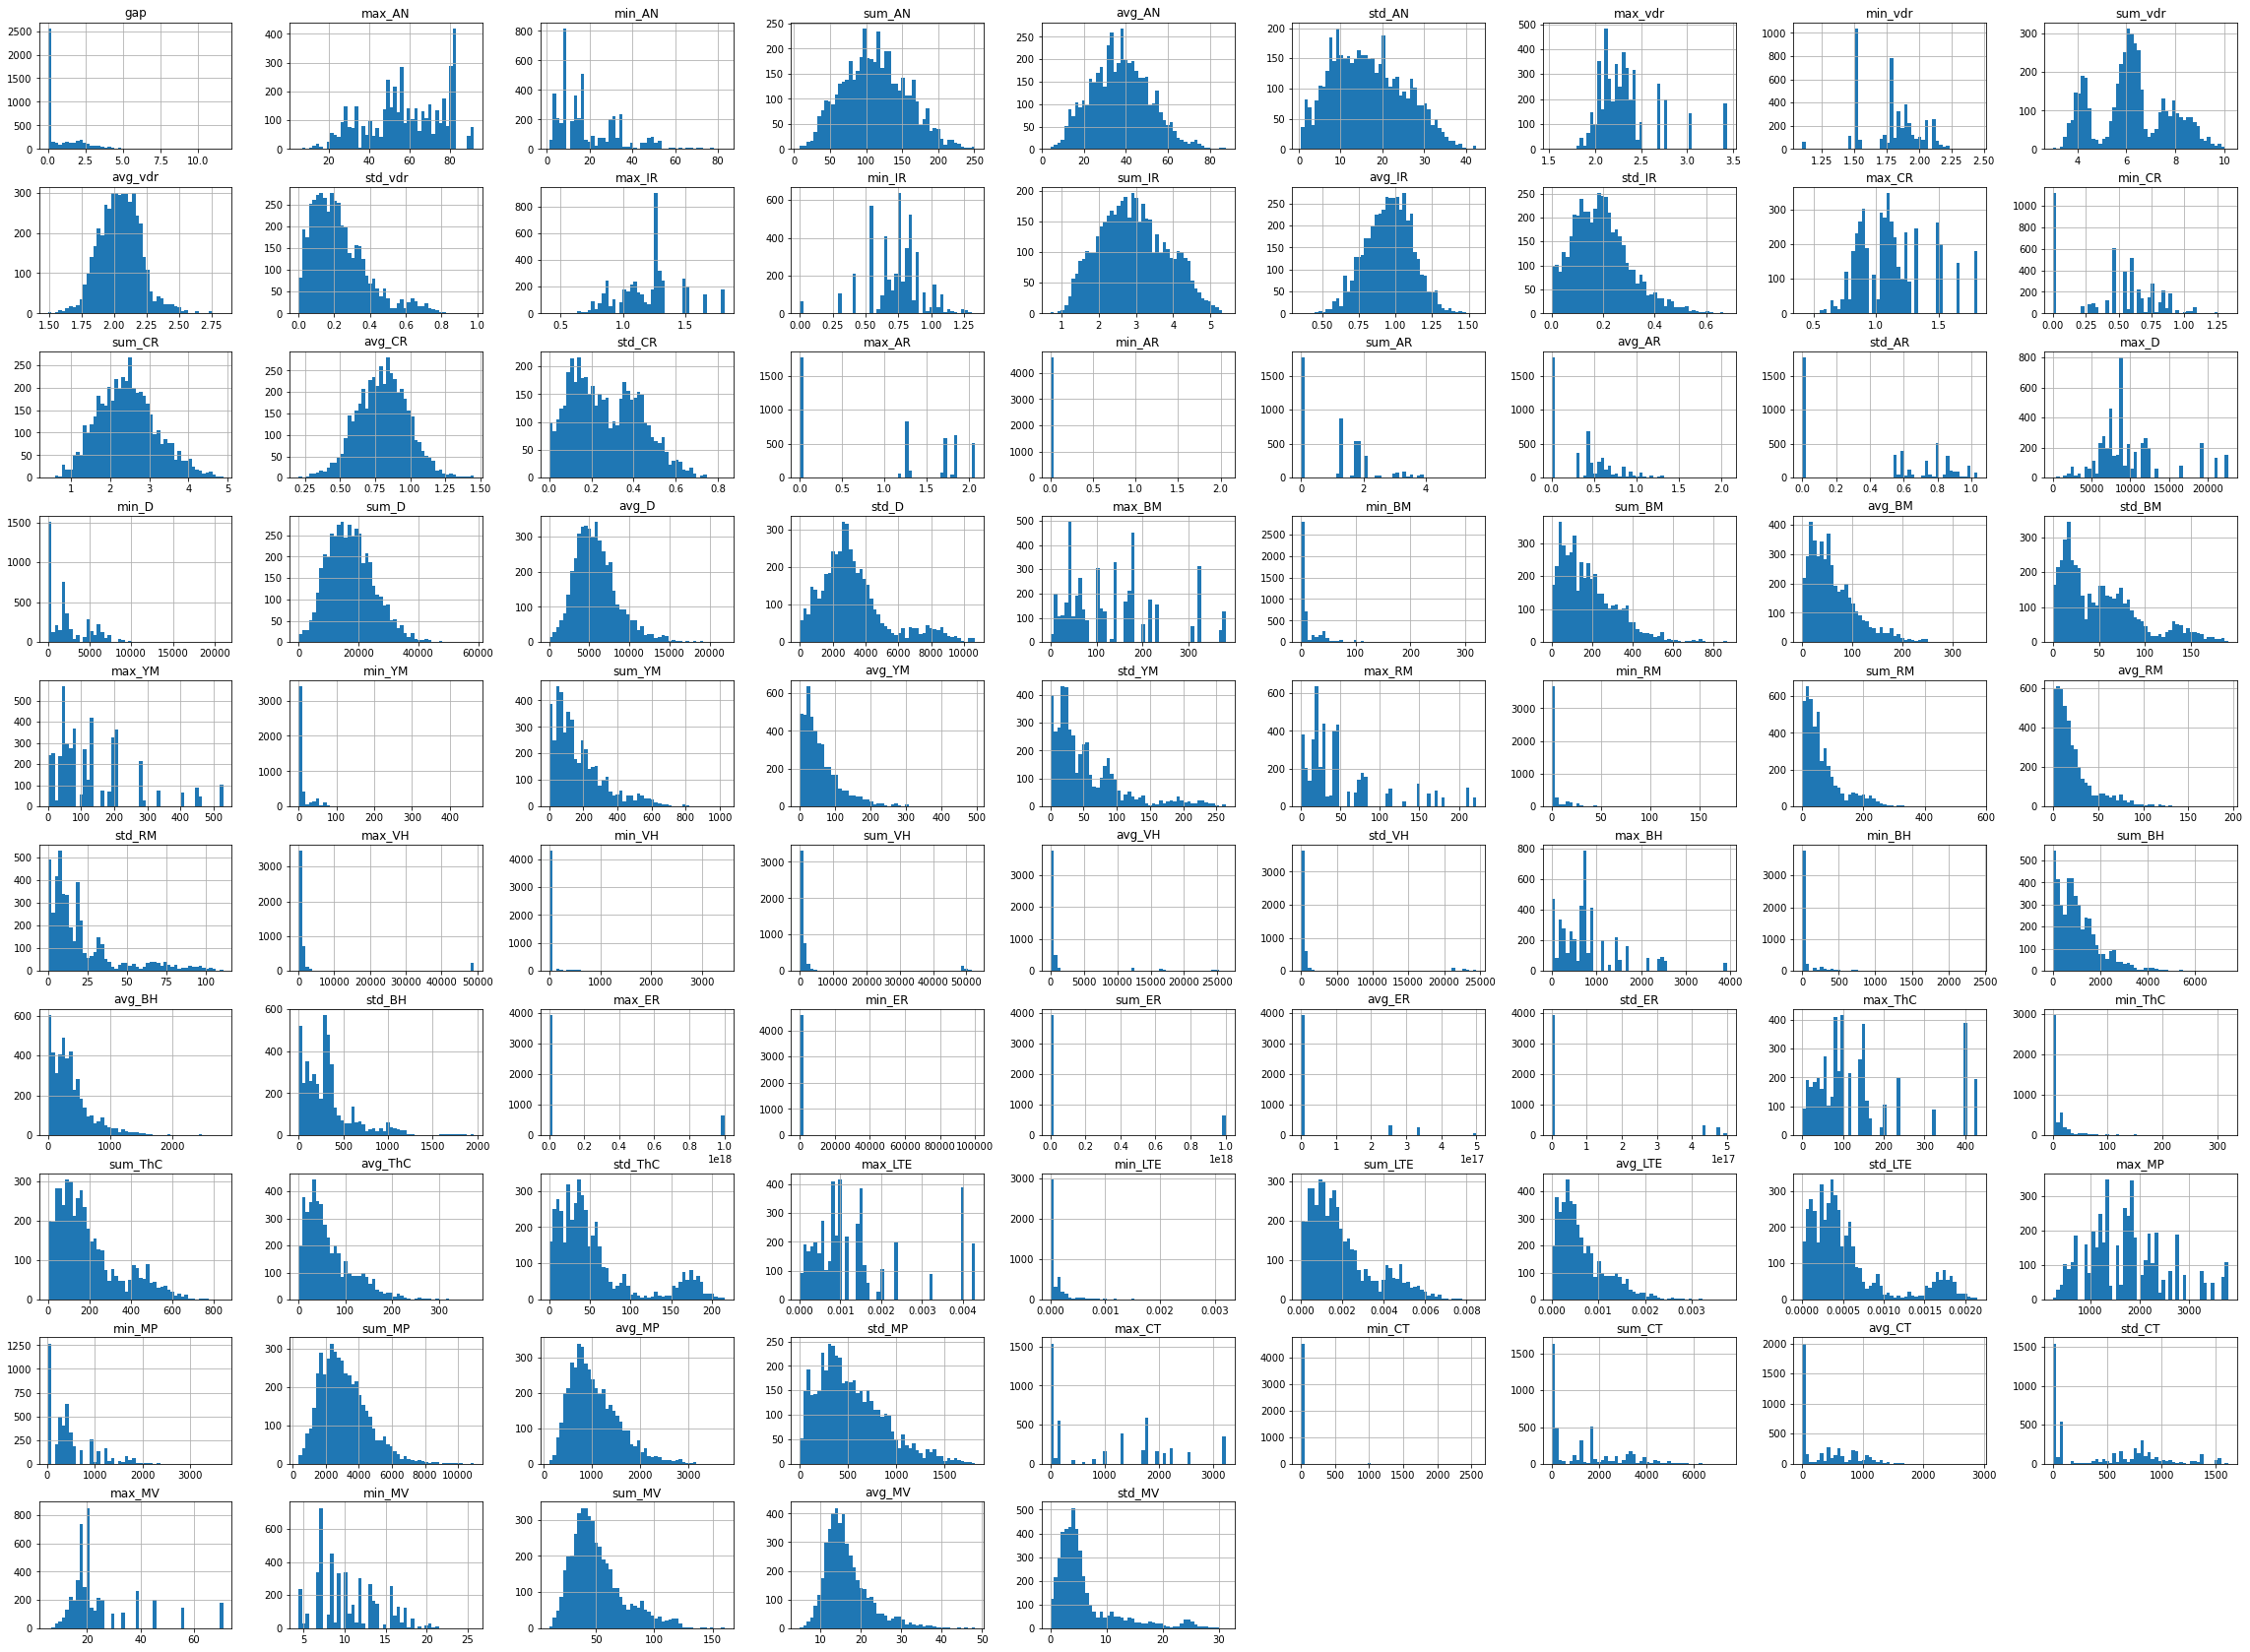

In [25]:
%matplotlib inline
bg.hist(bins=50, figsize=(40, 30))

### Find the correlation of band gap with the attributes 

In [26]:
corr_matrix = bg.corr()
corr = corr_matrix['gap'].sort_values(ascending=False)
print(corr)
corr.to_csv('corr1.csv', index=True)

gap       1.000000
max_AR    0.422399
sum_AR    0.419990
std_AR    0.408164
std_CR    0.397876
            ...   
min_MP   -0.339621
avg_RM   -0.347193
avg_YM   -0.369650
avg_MP   -0.383366
avg_D    -0.390069
Name: gap, Length: 86, dtype: float64


### Now we can visualise the correlationg and will observe the unecessary attributes

array([[<AxesSubplot:xlabel='gap', ylabel='gap'>,
        <AxesSubplot:xlabel='max_AR', ylabel='gap'>,
        <AxesSubplot:xlabel='sum_AR', ylabel='gap'>,
        <AxesSubplot:xlabel='std_AR', ylabel='gap'>,
        <AxesSubplot:xlabel='std_CR', ylabel='gap'>,
        <AxesSubplot:xlabel='sum_MV', ylabel='gap'>,
        <AxesSubplot:xlabel='avg_AR', ylabel='gap'>,
        <AxesSubplot:xlabel='sum_IR', ylabel='gap'>,
        <AxesSubplot:xlabel='std_AN', ylabel='gap'>,
        <AxesSubplot:xlabel='min_AR', ylabel='gap'>,
        <AxesSubplot:xlabel='min_ER', ylabel='gap'>,
        <AxesSubplot:xlabel='std_MP', ylabel='gap'>,
        <AxesSubplot:xlabel='sum_YM', ylabel='gap'>,
        <AxesSubplot:xlabel='min_MP', ylabel='gap'>,
        <AxesSubplot:xlabel='avg_RM', ylabel='gap'>,
        <AxesSubplot:xlabel='avg_YM', ylabel='gap'>,
        <AxesSubplot:xlabel='avg_MP', ylabel='gap'>,
        <AxesSubplot:xlabel='avg_D', ylabel='gap'>],
       [<AxesSubplot:xlabel='gap', ylabel='max_AR

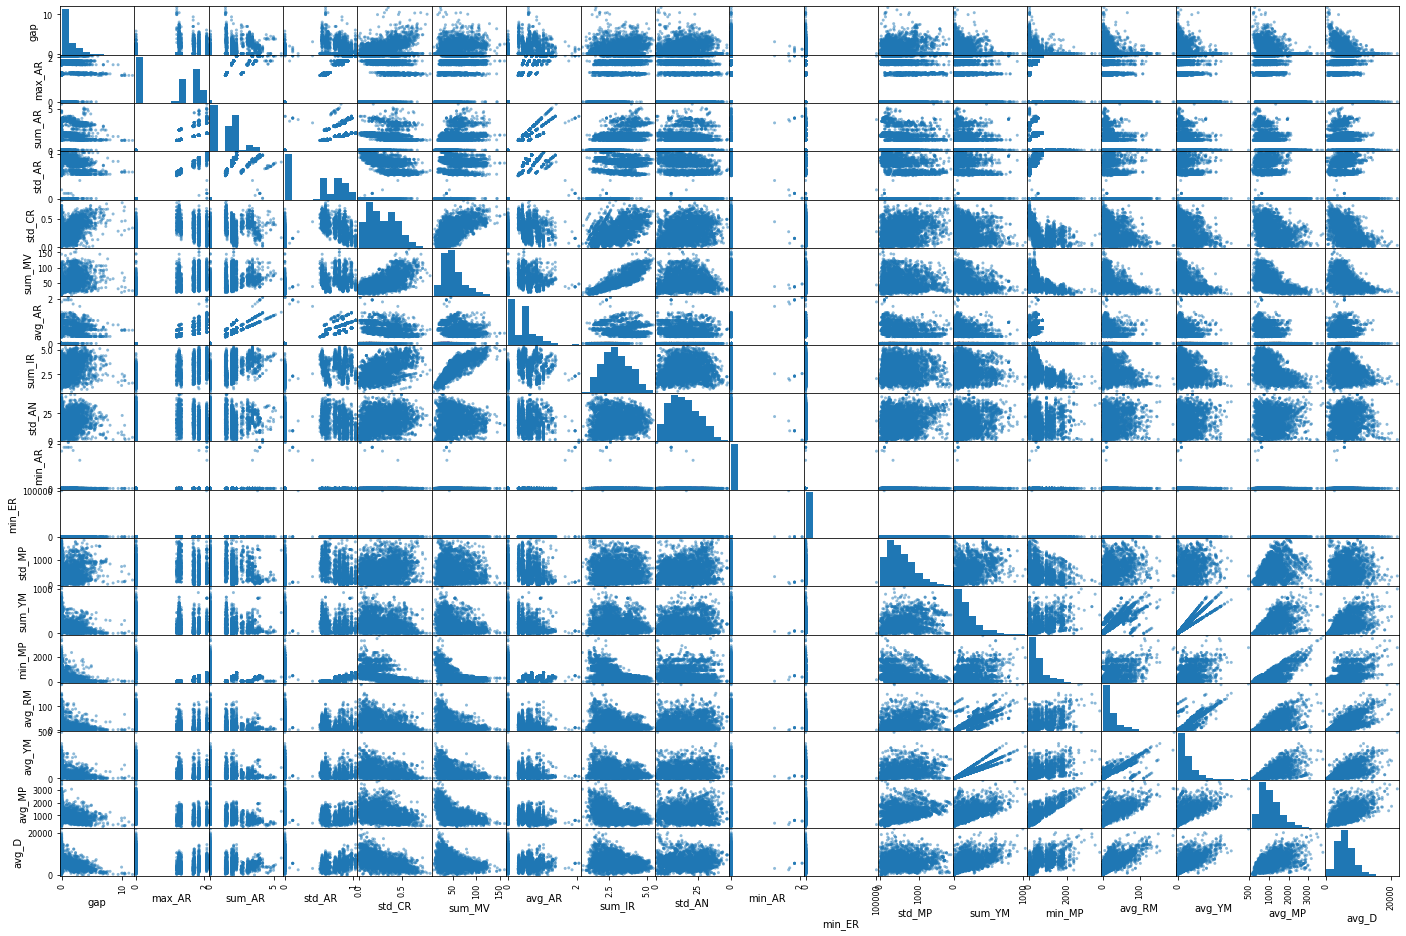

In [27]:
from pandas.plotting import scatter_matrix
attributes = ["gap", "max_AR", "sum_AR","std_AR", "std_CR", "sum_MV", "avg_AR","sum_IR","std_AN",
             "min_AR", "min_ER", "std_MP", "sum_YM", "min_MP", "avg_RM", "avg_YM", "avg_MP", "avg_D"]
scatter_matrix(bg[attributes], figsize = (24, 16))

### Let's drop the unwanted attributes from our data 

In [28]:

bg.drop(['std_AN', 'sum_AN', 'min_AR', 'min_ER', 'min_IR', 'std_MP', 'std_ThC', 'std_LTE', 'avg_vdr'], axis=1, inplace=True)

In [29]:
bg.head()

,formula,gap,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,Ag(AuS)2,0.00,79,16,47.333333,2.14,1.80,6.05,0.153695,1.086667,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,Ag(W3Br7)2,0.00,74,35,52.000000,2.18,1.85,6.14,0.141970,1.086667,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,Ag2BBr,0.00,47,5,29.000000,2.11,1.85,5.88,0.109848,1.086667,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


### Now we are with our required data frame to perform traing

Now first we will perform classification on our data set. So, for that I have redefined the band gaps as 0 when band gap value is less than 0.1.

In [30]:
bg.to_csv('bg1.csv', index=False)
bg1 = pd.read_csv('bg1.csv')

for j in range(4604):
    if bg1.loc[j, 'gap']>0.1:
        bg1.loc[j,'gap'] = 1
    
    
    
bg1.head()

,formula,gap,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,Ag(AuS)2,0.0,79,16,47.333333,2.14,1.80,6.05,0.153695,1.086667,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,Ag(W3Br7)2,0.0,74,35,52.000000,2.18,1.85,6.14,0.141970,1.086667,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,Ag0.5Ge1Pb1.75S4,1.0,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,Ag0.5Ge1Pb1.75Se4,1.0,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,Ag2BBr,0.0,47,5,29.000000,2.11,1.85,5.88,0.109848,1.086667,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


In [31]:
colms = list(range(2, 78, 1))

print(colms)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


In [32]:
#X = bg.iloc[:,colms].values
X = bg1.iloc[:,colms]
X.head()
#print(X)

,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,sum_IR,avg_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,79,16,47.333333,2.14,1.80,6.05,0.153695,1.086667,3.036667,1.012222,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,74,35,52.000000,2.18,1.85,6.14,0.141970,1.086667,2.735833,0.911944,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,3.859167,0.964792,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,3.992500,0.998125,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,47,5,29.000000,2.11,1.85,5.88,0.109848,1.086667,2.379167,0.793056,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


In [33]:
#Y = bg.iloc[:,[1]].values 
y = bg1['gap'].to_numpy()

#for i in range(len(y)):
#    if y[i]>0.1:
#        y[i]=1

Y = y.astype(int)
Y = Y.tolist()

#print(Y)

#Y.head()

### After extracting atrributes as X and band gap as Y, normalize the data set and spit the data set into test and training 

In [34]:
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [35]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (scaled_X, Y, test_size=0.2, random_state=0)

#### As we have many attributes to make the learnig process easier I have reduced the dimensionality to two component using Principal Component Analysis (PCA) 

In [36]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [37]:
print(X_test)

[[-4.18951912 -0.58704226]
 [ 4.22011365 -2.08394036]
 [ 5.66280651  2.18920018]
 ...
 [-3.94986607 -1.32341117]
 [ 4.7793252  -3.73050859]
 [-1.02836975 -5.33560129]]


### Now implement Classification and the classification scores

### classification-1

In [38]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [39]:
Y_predicted = LR.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)
print("Accuracy : ", accuracy_score(Y_test, Y_predicted))
print("precision : ", precision_score(Y_test, Y_predicted))
print("recall : ", recall_score(Y_test, Y_predicted))
print("F1 score : ", f1_score(Y_test, Y_predicted))

[[356 125]
 [105 335]]
Accuracy :  0.750271444082519
precision :  0.7282608695652174
recall :  0.7613636363636364
F1 score :  0.7444444444444445


### classification-2

In [40]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [41]:
Y_predicted = RFC.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)
print("Accuracy : ", accuracy_score(Y_test, Y_predicted))
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision : ", precision_score(Y_test, Y_predicted))
print("recall : ", recall_score(Y_test, Y_predicted))
print("F1 score : ", f1_score(Y_test, Y_predicted))

[[387  94]
 [ 96 344]]
Accuracy :  0.7937024972855592
precision :  0.7853881278538812
recall :  0.7818181818181819
F1 score :  0.7835990888382688


####  The receiver operating characteristic (ROC)

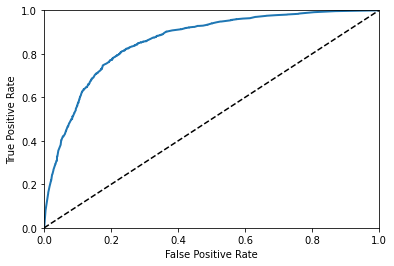

In [42]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve
y_probas_forest = cross_val_predict(RFC, X_train, Y_train, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]


fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train,y_scores_forest)
def plot_roc_curve(fpr_forest, tpr_forest, label=None):
 plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

# classification-3

In [43]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(random_state=42)
SGDC.fit(X_train, Y_train)

SGDClassifier(random_state=42)

In [44]:
Y_predicted = SGDC.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)
print("Accuracy : ", accuracy_score(Y_test, Y_predicted))
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision : ", precision_score(Y_test, Y_predicted))
print("recall : ", recall_score(Y_test, Y_predicted))
print("F1 score : ", f1_score(Y_test, Y_predicted))

[[364 117]
 [154 286]]
Accuracy :  0.7057546145494028
precision :  0.7096774193548387
recall :  0.65
F1 score :  0.6785290628706998


In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(SGDC, X_train, Y_train, cv=3, scoring="accuracy")

array([0.68078176, 0.6742671 , 0.73023635])

In [46]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(SGDC, X_train, Y_train, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)



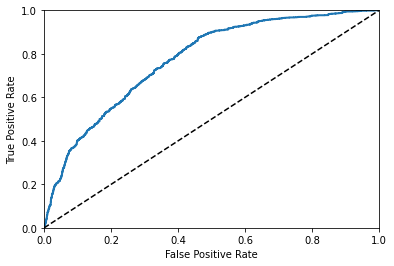

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

# classification-4

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [49]:
Y_predicted = knn_clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)
print("Accuracy : ", accuracy_score(Y_test, Y_predicted))
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision : ", precision_score(Y_test, Y_predicted))
print("recall : ", recall_score(Y_test, Y_predicted))
print("F1 score : ", f1_score(Y_test, Y_predicted))

[[369 112]
 [107 333]]
Accuracy :  0.762214983713355
precision :  0.748314606741573
recall :  0.7568181818181818
F1 score :  0.7525423728813558


In [50]:
#clf_ob = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
#print(clf_ob.score(X_test, Y_test))
#Y_predicted = clf_ob.predict(X_test)

In [51]:
bg1 = pd.read_csv('bg1.csv')

In [52]:
bg1[(bg1['gap'] > 0.1)]

,formula,gap,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
2,Ag0.5Ge1Pb1.75S4,1.83,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,Ag0.5Ge1Pb1.75Se4,1.51,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
6,Ag2GeS3,1.98,47,16,31.666667,2.11,1.80,6.02,0.146135,1.086667,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.27,39.43,13.143333,2.174785
7,Ag2GeSe3,0.90,47,32,37.666667,2.11,1.90,6.12,0.098995,1.086667,...,1766.0,0.0,1766.0,588.666667,832.500384,16.42,10.27,40.32,13.440000,2.514319
8,Ag2HgI4,2.47,80,47,60.000000,2.23,1.98,6.32,0.102089,1.273333,...,1750.0,0.0,2569.0,856.333333,714.922063,25.72,10.27,50.08,16.693333,6.570572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4584,ZrNiSb,0.55,51,28,39.666667,2.23,1.97,6.26,0.107806,0.860000,...,0.0,0.0,0.0,0.000000,0.000000,18.19,6.59,38.80,12.933333,4.797613
4586,ZrO2,4.99,40,8,24.000000,2.23,1.52,3.75,0.355000,1.260000,...,154.6,0.0,154.6,77.300000,77.300000,17.36,14.02,31.38,15.690000,1.670000
4592,ZrS2,2.75,40,16,28.000000,2.23,1.80,4.03,0.215000,0.880000,...,1314.0,0.0,1314.0,657.000000,657.000000,15.53,14.02,29.55,14.775000,0.755000
4596,ZrSe2,2.00,40,34,37.000000,2.23,1.90,4.13,0.165000,1.013333,...,1766.0,0.0,1766.0,883.000000,883.000000,16.42,14.02,30.44,15.220000,1.200000


In [53]:
bg1.to_csv('bg2.csv', index=False)
bg2 = pd.read_csv('bg2.csv')

In [54]:
#scatter_matrix(bg1[attributes], figsize = (12, 8))
#bg2 = bg1.filter(['gap'])
#bg2 = bg1[bg1.columns[-1]]

bg3 = bg2['gap'].to_numpy()


In [55]:
print(bg3)

[0.   0.   1.83 ... 0.   0.   0.  ]


In [56]:
bg2.drop(bg2.columns[[0, 1]], axis=1, inplace=True)

In [57]:
bg2.head()

,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,sum_IR,avg_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,79,16,47.333333,2.14,1.80,6.05,0.153695,1.086667,3.036667,1.012222,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,74,35,52.000000,2.18,1.85,6.14,0.141970,1.086667,2.735833,0.911944,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,3.859167,0.964792,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,3.992500,0.998125,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,47,5,29.000000,2.11,1.85,5.88,0.109848,1.086667,2.379167,0.793056,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


#### Scaling the data set 

In [58]:
scaler = StandardScaler().fit(bg2)

In [59]:
bg2.head()

,max_AN,min_AN,avg_AN,max_vdr,min_vdr,sum_vdr,std_vdr,max_IR,sum_IR,avg_IR,...,max_CT,min_CT,sum_CT,avg_CT,std_CT,max_MV,min_MV,sum_MV,avg_MV,std_MV
0,79,16,47.333333,2.14,1.80,6.05,0.153695,1.086667,3.036667,1.012222,...,1314.0,0.0,1314.0,438.000000,619.425540,15.53,10.21,36.01,12.003333,2.493850
1,74,35,52.000000,2.18,1.85,6.14,0.141970,1.086667,2.735833,0.911944,...,586.0,0.0,586.0,195.333333,276.243049,19.78,9.47,39.52,13.173333,4.683021
2,82,16,44.250000,2.11,1.80,8.04,0.126689,1.122500,3.859167,0.964792,...,1314.0,0.0,1314.0,328.500000,568.978690,18.26,10.27,57.69,14.422500,2.907932
3,82,32,48.750000,2.11,1.90,8.14,0.086168,1.122500,3.992500,0.998125,...,1766.0,0.0,1766.0,441.500000,764.700432,18.26,10.27,58.58,14.645000,3.016194
4,47,5,29.000000,2.11,1.85,5.88,0.109848,1.086667,2.379167,0.793056,...,586.0,0.0,586.0,195.333333,276.243049,19.78,4.39,34.44,11.480000,6.340931


In [60]:
# Scaling the data set
scaled_bg2 = scaler.transform(bg2)

#### Splitting the data set

In [61]:
# Splitting the data set

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(scaled_bg2, bg3, test_size=.2, random_state=42)

### Definig the machine learning model

In [62]:
regr = RandomForestRegressor(n_estimators=300, max_depth=200, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('RF MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('RF R2\t'+str(r2_score(y_test, y_predicted))+'\n')

RF MSE	0.834897295434558

RF R2	0.6118107958622025



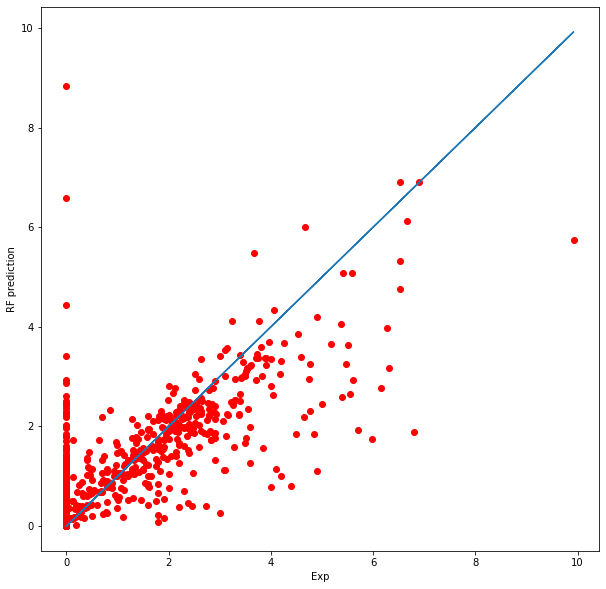

In [63]:
xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF prediction')
plt.xlabel('Exp')
plt.savefig('RF', bbox_inches='tight')

### Conclusion and remark 

1. I have implemented four different models for metal and non-metal classification. Random forest classification predicts the result with the highest accuracy of 79.37%, which also agrees with the ROC plot.

2. The Random forest regression model is implemented above for the band gap correlation of non-metals.

Remark:

This model needs to be fine tuned before being used for practical purposes.

### References 

1. Predicting the Band Gaps of Inorganic Solids by Machine Learning, Zhuo et. al., J. Phys. Chem. Lett. 2018, 9, 7, 1668–1673, https://doi.org/10.1021/acs.jpclett.8b00124

2. The utility of composition-based machine learning models for band gap prediction, Vishwesh Venkatraman, Computational Materials Science, https://doi.org/10.1016/j.commatsci.2021.110637 
3. Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurélien Géron, O’Reilly books.
4. Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib, Robert Johansson, https://doi.org/10.1007/978-1-4842-4246-9

5. Learning scikit-learn: Machine Learning in Python, Raúl Garreta, Guillermo Moncecchi, Published by Packt Publishing Ltd.

# Thank You!